In [97]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy
import math
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [98]:
movie_ratings = pd.read_csv("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/movieRatings.txt", names = ["Movie", "RT", "IMDB", "MC"])
movie_features = pd.read_json("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/tweetsMovies.json", typ='series')
movie_popularity = pd.read_json("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/moviePopularity.json", typ='series')
movie_budget = pd.read_json("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/moviebudget.json", typ='series')

with open('/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/boxEarnings.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame({'BOR': data})
df = df.reset_index()
df.columns = ["Movie","BOR"]
movie_BOR = df

df1 = pd.DataFrame(movie_popularity)
df1 = df1.reset_index()
df1.columns = ["Movie","popul"]
df1

df2 = pd.DataFrame(movie_budget)
df2 = df2.reset_index()
df2.columns = ["Movie","budget"]
df2.head()


,Movie,budget
0,Master Z: Ip Man Legacy,0
1,Spider-Man: Into the Spider-Verse,90000000
2,Aquaman,160000000
3,Fantastic Beasts: The Crimes of Grindelwald,200000000
4,Avengers: Infinity War,300000000


In [99]:
movie_features = movie_features.T #transposed dataframe
movie_features = movie_features.reset_index()
movie_features.columns = ['Movie', 'feat'] #"sent","avg_rt"]
movie_features1 = pd.DataFrame(movie_features.feat.tolist(), columns=['sent', 'avg_rt'])

movie_features = movie_features[['Movie']]
#movie_features = movie_features.merge(movie_features[['Movie','sent','avg_rt']], on = ['Movie'])
movie_features = movie_features.join(movie_features1[['sent', 'avg_rt']])


In [100]:
#movie_BOR = movie_BOR[~movie_BOR['BOR'].isin([''])]
# BOR_int = movie_BOR['BOR'].astype(str).astype(int)
# BOR_int = pd.DataFrame(BOR_int)
# BOR_int.columns = ['BOR_int']
# display(movie_BOR)
# movie_BOR = movie_BOR.merge(BOR_int[['BOR_int']])

In [101]:
#result = pd.concat([movie_ratings, movie_features], axis=0, sort=False)
final = movie_ratings.merge(movie_features[['Movie','sent','avg_rt']], on = ['Movie'])
final = final.merge(df1[['Movie','popul']], on = ['Movie'])
final = final.merge(df2[['Movie','budget']], on = ['Movie'])
final = final.merge(movie_BOR[['Movie','BOR']], on = ['Movie'])

#final.dtypes
final
final = final[~final['BOR'].isin(['0'])]

final

,Movie,RT,IMDB,MC,sent,avg_rt,popul,budget,BOR
1,Spider-Man: Into the Spider-Verse,97.0,8.5,87.0,0.287500,1.588333,71.860,90000000,35363376
2,Aquaman,65.0,7.2,55.0,0.114167,0.306667,63.747,160000000,335061807
3,Fantastic Beasts: The Crimes of Grindelwald,37.0,6.7,52.0,0.900833,0.460000,5.379,200000000,62163104
4,Avengers: Infinity War,85.0,8.5,68.0,0.144167,0.737500,219.745,300000000,257698183
5,Mary Poppins Returns,79.0,7.0,66.0,0.409167,0.519167,43.476,130000000,23523121
6,Green Book,78.0,8.3,69.0,-0.233333,0.632500,5.379,23000000,320429
7,Bohemian Rhapsody,61.0,8.1,49.0,0.202500,1.029167,46.174,52000000,51061119
8,Creed II,84.0,7.3,66.0,0.165833,0.165833,5.379,50000000,35574710
9,Black Panther,97.0,7.3,88.0,-0.267500,0.457500,109.074,200000000,202003951
10,Ralph Breaks the Internet,88.0,7.2,71.0,0.338333,1.384167,51.177,175000000,56237634


<h1>Normalize Movie Ratings</h1>

In [102]:
# Normalize by Columns
final['IMDB']=(final['IMDB']-final['IMDB'].min())/(final['IMDB'].max()-final['IMDB'].min())
final['RT']=(final['RT']-final['RT'].min())/(final['RT'].max()-final['RT'].min())
final['MC']=(final['MC']-final['MC'].min())/(final['MC'].max()-final['MC'].min())
final['BOR']=(final['BOR']-final['BOR'].min())/(final['BOR'].max()-final['BOR'].min())
final['popul']=(final['popul']-final['popul'].min())/(final['popul'].max()-final['popul'].min())
final['budget']=(final['budget']-final['budget'].min())/(final['budget'].max()-final['budget'].min())

final['sent'] = final['sent'].round()
final
final = final[final['budget'] > 0]

In [103]:
final = final[final.Movie != 'Aquaman']
final = final[final.Movie != 'Black Panther']
final = final[final.Movie != 'The Nun']
final = final[final.Movie != 'First Man']
final = final[final.Movie != 'The Favourite']
final = final[final.Movie != 'Green Book']
final = final[final.Movie != 'Replicas']
final = final[final.Movie != 'London Fields']

final

,Movie,RT,IMDB,MC,sent,avg_rt,popul,budget,BOR
1,Spider-Man: Into the Spider-Verse,1.000000,1.000000,0.959459,0.0,1.588333,0.317911,0.300000,0.105093
3,Fantastic Beasts: The Crimes of Grindelwald,0.381443,0.571429,0.486486,1.0,0.460000,0.011282,0.666667,0.185117
4,Avengers: Infinity War,0.876289,1.000000,0.702703,0.0,0.737500,1.000000,1.000000,0.768990
5,Mary Poppins Returns,0.814433,0.642857,0.675676,0.0,0.519167,0.186996,0.433333,0.069737
7,Bohemian Rhapsody,0.628866,0.904762,0.445946,0.0,1.029167,0.199440,0.173333,0.151966
8,Creed II,0.865979,0.714286,0.675676,0.0,0.165833,0.011282,0.166667,0.105724
10,Ralph Breaks the Internet,0.907216,0.690476,0.743243,0.0,1.384167,0.222515,0.583333,0.167424
11,Mortal Engines,0.278351,0.452381,0.378378,0.0,0.234167,0.178104,0.333333,0.022071
12,The Mule,0.721649,0.666667,0.567568,0.0,0.461667,0.326315,0.166667,0.051780
13,A Star Is Born,0.917526,0.833333,0.972973,0.0,1.814167,0.011282,0.120000,0.127621


In [104]:
myL = []
for i in final['Movie']:
    myL.append(i)
myL

['Spider-Man: Into the Spider-Verse',
 'Fantastic Beasts: The Crimes of Grindelwald',
 'Avengers: Infinity War',
 'Mary Poppins Returns',
 'Bohemian Rhapsody',
 'Creed II',
 'Ralph Breaks the Internet',
 'Mortal Engines',
 'The Mule',
 'A Star Is Born',
 'Ant-Man and the Wasp',
 'Venom',
 'Instant Family',
 'Fifty Shades Freed',
 'Second Act',
 'Robin Hood',
 'Bumblebee',
 'Deadpool 2',
 'Vice',
 'Incredibles 2',
 'The Grinch',
 'Jurassic World: Fallen Kingdom',
 'A Simple Favor',
 'Overlord',
 'The Possession of Hannah Grace',
 'Mary Queen of Scots',
 "The Girl in the Spider's Web",
 'The First Purge',
 'Goosebumps 2: Haunted Halloween',
 'Halloween',
 'A Quiet Place',
 'Sicario: Day of the Soldado',
 'Den of Thieves',
 'Tomb Raider',
 'Upgrade']

<h1>Multiple Linear Regression Model </h1>

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

formula = "BOR ~ 1 +IMDB + popul + RT + MC + sent + avg_rt + budget"
y, X = patsy.dmatrices(formula, final, return_type='matrix')  #remember this drops missing data for you


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
#results.predict([[0.5,0.5,0.5,0.5,0.5,0.5,0.5]])

                            OLS Regression Results                            
Dep. Variable:                    BOR   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4.558
Date:                Fri, 03 May 2019   Prob (F-statistic):            0.00182
Time:                        20:58:05   Log-Likelihood:                 25.367
No. Observations:                  35   AIC:                            -34.73
Df Residuals:                      27   BIC:                            -22.29
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1009      0.077     -1.310      0.2

<h1>Plot data and regression model</h1>

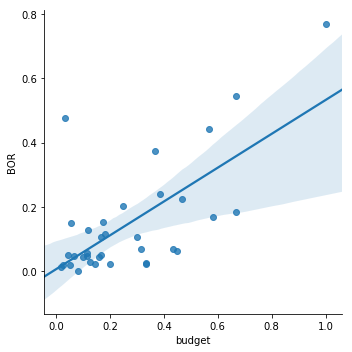

In [106]:
import seaborn as sns
# Use a Linear Model Plot
sns.lmplot(x='budget', y='BOR',data=final)

<h1>Residuals Plot</h1>

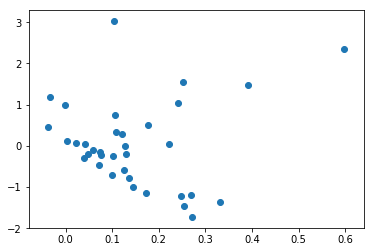

In [107]:
infl = results.get_influence() #To get the residuals
plt.scatter(results.fittedvalues,infl.resid_studentized_internal)

<h1>Neural Networks</h1>

In [108]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
reg = MLPRegressor(hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
reg = reg.fit(X_train,y_train)
#reg.score(X_train, y_train, sample_weight=None)
y_test
X_test

/afs/crc.nd.edu/user/j/jnazario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.        ,  0.37787974,  0.25720438,  1.08237266,  1.03378809,
        -0.2       ,  0.21595353,  1.43165536],
       [ 0.        ,  0.80974229, -0.34031255,  1.36258862,  1.80575517,
        -0.2       , -0.34489932, -0.95685954],
       [ 0.        ,  0.2699141 ,  0.69173444,  1.08237266,  0.96360926,
        -0.2       ,  4.1629911 ,  0.90255396],
       [ 0.        , -1.88939869,  0.10375809, -0.27867632, -0.15925195,
         5.        , -0.53393805, -1.01732827],
       [ 0.        , -0.91770793,  0.08690385, -0.63895399,  0.61271513,
        -0.2       ,  0.10264418, -0.30682067],
       [ 0.        , -0.80974229, -0.81635703, -0.83910825, -0.93121903,
        -0.2       , -0.57322622, -0.56381278],
       [ 0.        , -1.34957049, -0.81635703, -0.59892314, -0.22943078,
        -0.2       , -0.64098408, -0.68475024],
       [ 0.        ,  0.91770793, -0.81635703,  1.32255777,  1.66539752,
        -0.2       , -0.46504141,  1.80958494],
       [ 0.        ,  1.02567357

In [111]:
predictions = reg.predict(X_test)
# create Pandas Series with define indexes 
pred = pd.Series(predictions) 
myP = pd.Series.to_frame(pred)

# create Pandas Series with define indexes 
myArray = np.ndarray.tolist(y_test)
myList = []
for i in myArray:
    myList.append(i.pop())
y_t = pd.Series(myList) 
myT = pd.Series.to_frame(y_t)

In [112]:
# d = {'predictions': myP, 'y_test': myT}
# pd.DataFrame(data=d, index=0)
myP.columns = ['pred']
myT.columns = ['actual']
testing = myP.join(myT[['actual']])

testing

,pred,actual
0,0.240923,0.167424
1,-0.322915,0.149406
2,0.352401,0.225874
3,-0.461111,0.051377
4,-0.165076,0.022693
5,0.089703,0.022818
6,-0.039465,0.046682
7,0.083434,0.545008
8,-0.277979,0.475296


In [113]:
r2_score(testing['actual'], testing['pred'])

-3.3539435062487586